In [19]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt

### Download the dataset from Kaggle


In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Investigate the attributes and propose which of them need to be normalized? Explain your choice.

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa37f7595c0>,
      dtype=object)

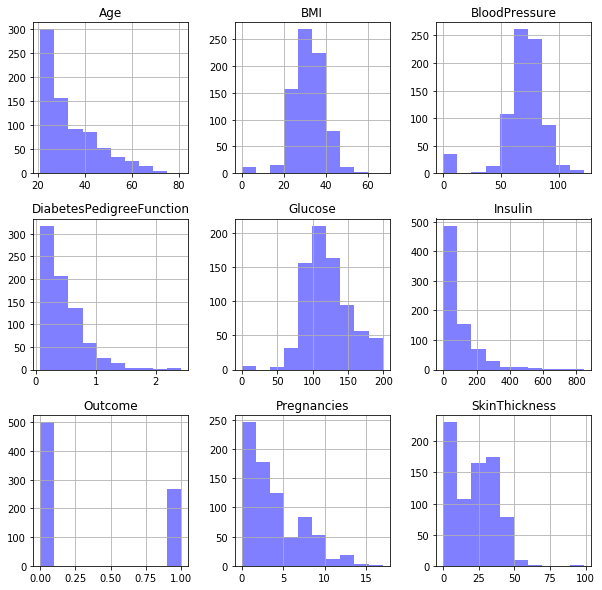

In [17]:
hist_plot = df.hist(color='blue', alpha=0.5,figsize=(10, 10))

Though data doesn't contain any NA, it has a lot of zeros, that can not possibly be the correct value for following columns:
- skin thickness (should be at least 10)
- insulin
- glucose
- blood pressure
- BMI

### Perform normalization using the most appropriate method. Why did you choose it? How can you check that it works better than others?

Two most popular types of normalization are
- Min-Max    
- Z score

Let's see how both of them influence the data

#### Min max is a method, in which we scale data between 0 and 1

In [34]:
scaler = preprocessing.MinMaxScaler()
minmax = scaler.fit_transform(df.iloc[:, :8])
minmax = pd.DataFrame(minmax, columns=df.columns[:8])

/home/mhirna/miniconda3/envs/AI_course/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


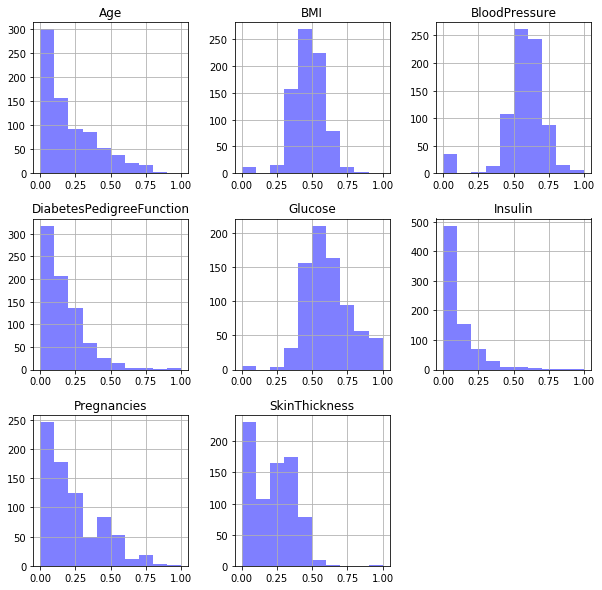

In [35]:
minmax_hist = minmax.hist(color='blue', alpha=0.5,figsize=(10, 10))

MinMax works pretty well, however, outliers in insulin for example make a big impact, as now range of insulin without outliers is not that big, so maybe we should try another method.

#### Z-score normalization, or otherwise called standartization assumes that values are normally distributed; makes values centered around 0, with a standard deviation of 1.

In [30]:
df_z = pd.DataFrame(preprocessing.scale(df.iloc[:, :8]), columns=df.columns[:8])

/home/mhirna/miniconda3/envs/AI_course/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


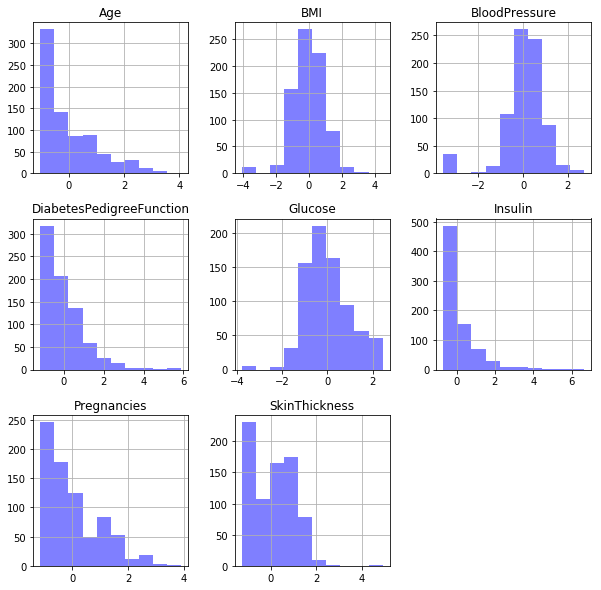

In [33]:
z_hist = df_z.hist(color='blue', alpha=0.5,figsize=(10, 10))

It works well, at least for BMI, BloodPressure and Glucose. Also, it works well with outliers. However, because I haven't done anything with zeros (missing or wrong data) in SkinThickness for example, the data still looks weird.

### Why do we need to normalize numerical attributes?

- For some algorithms to perform better and faster
- For features to have similar influence
- Allows to compare performance

### What is standartization and how it differs from normalization?

As I expained above, standartization is one of the most popular methods of data scaling, it's also called z-score normalization and if you want to find out more check this: https://medium.com/@zaidalissa/standardization-vs-normalization-da7a3a308c64